In [2]:
import pandas as pd 
import numpy as py 
import sklearn as sk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [3]:
data = pd.read_csv("C:/Users/Aakanksha/Desktop/titanic dataset/train.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning 

In [6]:
# finding out the NULL values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Remove columns which are not required 
df=data.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1)

# Remove 177 null rows from the age column 
df_clean=df.dropna()

print(df_clean.head(5))

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [8]:
# To check if the data is cleaned or not.
df_clean.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [9]:
# No. of rows and Columns
print(df_clean.shape)

(712, 8)


## Exploratory Data Analysis


In [10]:
df_clean['Sex'].value_counts()

male      453
female    259
Name: Sex, dtype: int64

In [11]:
df_clean['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

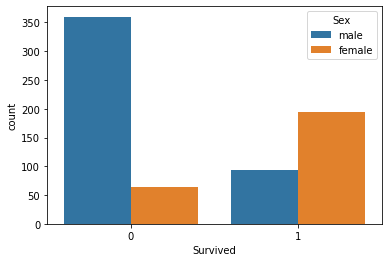

In [12]:
fig=plt.figure()
ax1=plt.subplot()
sns.countplot(x = 'Survived', hue = 'Sex', data = df_clean, ax=ax1)

In [13]:
df_clean['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

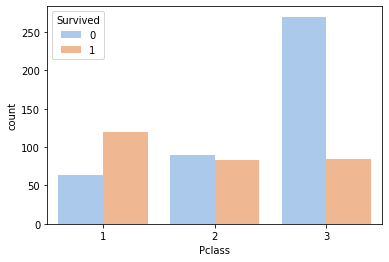

In [14]:
# Set the palette to the "pastel" default palette:
sns.set_palette("pastel")

fig=plt.figure()
ax1=plt.subplot()
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_clean, ax=ax1)

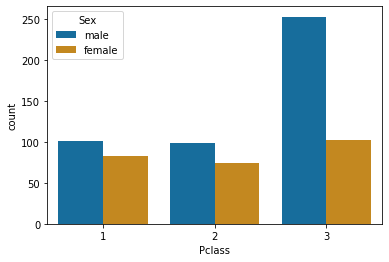

In [15]:
# Set the palette to the "pastel" default palette:
sns.set_palette("colorblind")
fig=plt.figure()
ax1=plt.subplot()
sns.countplot(x = 'Pclass', hue = 'Sex', data = df_clean, ax=ax1)

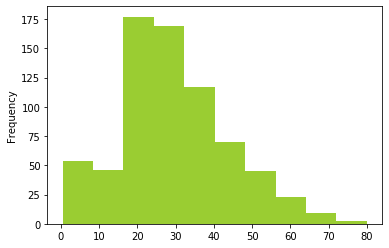

In [16]:
df_clean['Age'].plot(kind='hist',bins=10, color='yellowgreen')


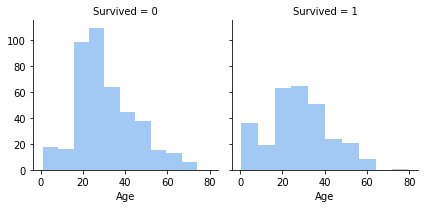

In [17]:
# Set the palette to the "pastel" default palette:
sns.set_palette("pastel")
g = sns.FacetGrid(df_clean, col='Survived')
g.map(plt.hist, 'Age', bins=10)

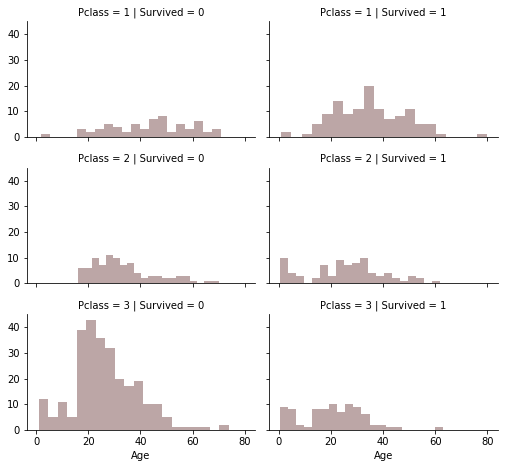

In [18]:
sns.set_palette("pink")
grid = sns.FacetGrid(df_clean, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

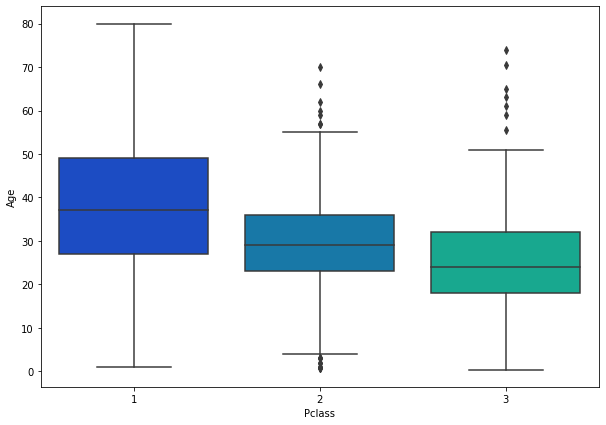

In [19]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=df_clean,palette='winter')

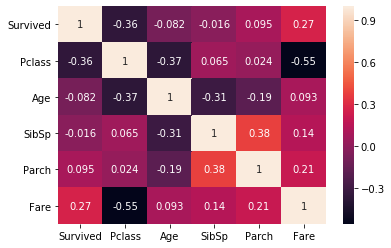

In [20]:
correlation_mat = df_clean.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

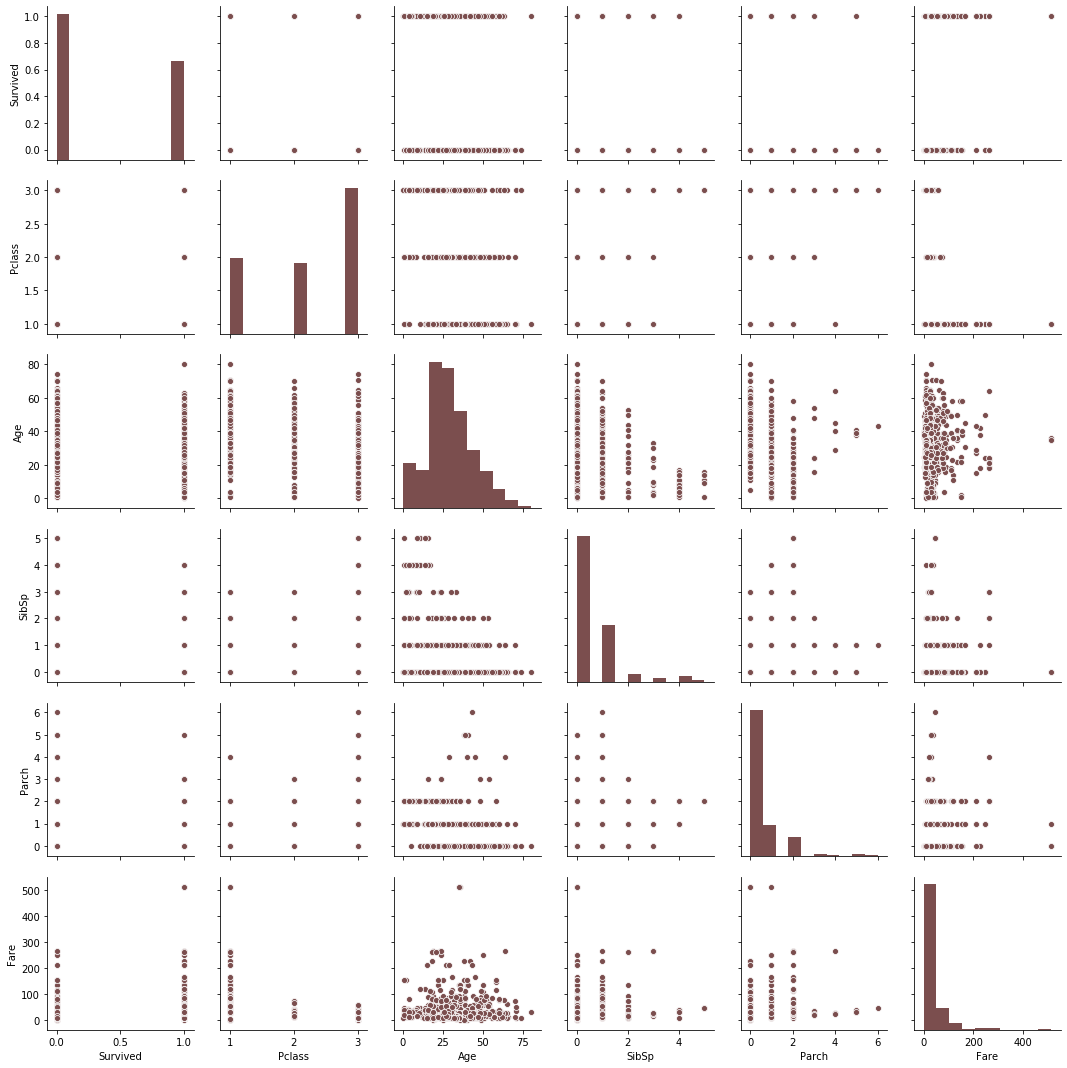

In [21]:
sns.pairplot(df_clean)

## converting categorical features


In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 70.1+ KB


In [23]:
#convert categorical features to dummy variables using pandas
sex = pd.get_dummies(df_clean['Sex'],drop_first=True)
embark = pd.get_dummies(df_clean['Embarked'],drop_first=True)


In [24]:
#After dummying drop the rest of the columns which are not needed
df_clean.drop(['Sex','Embarked'],axis=1,inplace=True)

C:\Users\Aakanksha\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
#concatenate the new sex and embarked columns to the dataframe
df_clean= pd.concat([df_clean,sex,embark],axis=1)

In [26]:
df_clean.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression 


In [27]:
X = df_clean.drop('Survived',axis=1)
y = df_clean['Survived']

In [28]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.30, 
                                                    random_state=101)

In [29]:
#Training and Predicting
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
#logmodel.coef_

C:\Users\Aakanksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


###  statistical summary 

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.507644
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.248     
Dependent Variable: Survived         AIC:              738.8855  
Date:               2020-08-11 17:01 BIC:              775.4301  
No. Observations:   712              Log-Likelihood:   -361.44   
Df Model:           7                LL-Null:          -480.45   
Df Residuals:       704              LLR p-value:      9.8066e-48
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.0525     0.0957     0.5490   0.5830   -0.1350    0.2400
Age       0.0011     0.0060     0.1895   0.8497   -0.0106 

In [31]:
#Evaluation
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[106  22]
 [ 26  60]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       128
           1       0.73      0.70      0.71        86

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.78      0.77       214

0.7757009345794392


## ROC Curve

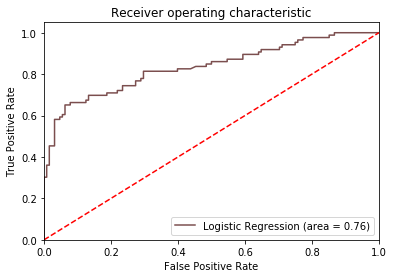

In [32]:
#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
#The dotted line represents the ROC curve of a purely random classifier
#a good classifier stays as far away from that line as possible (toward the top-left corner)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Model fitting
### Train, Test Split

In [33]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_clean,
                                         test_size = 0.20,
                                         random_state = 42)

# # Fitting logistic regression

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import logit 


formula = ('Survived ~ SibSp + male ')

model = logit(formula = formula, data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.510072
         Iterations 6


## Model summary table

In [35]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                  0.2400
Time:                        17:01:58   Log-Likelihood:                -290.23
converged:                       True   LL-Null:                       -381.86
Covariance Type:            nonrobust   LLR p-value:                 1.600e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3045      0.187      6.962      0.000       0.937       1.672
SibSp         -0.2765      0.119     -2.324      0.020      -0.510      -0.043
male          -2.6495      0.218    -12.135      0.000      -3.077      -2.222
==============================================================================
"""

## Model evaluation on test data set

In [36]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score



# Compute prediction
prediction = model.predict(exog = test_data)



# Define the cutoff
cutoff = 0.5

# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)

# Assign actual class labels from the test sample to y_actual
y_actual = test_data[df_clean]



ValueError: Must pass DataFrame with boolean values only

In [37]:
model.pred_table()

array([[293.,  51.],
       [ 69., 156.]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,predictions))
print(accuracy_score(y_actual, predictions))

NameError: name 'y_actual' is not defined

In [39]:
feature_cols = ['SibSp','male']
X = df_clean[feature_cols] # Features
y = df_clean.Survived # Target Variable

In [42]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.25, 
                                                    random_state=0)

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Aakanksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[86, 18],
       [23, 51]], dtype=int64)

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      566
Method:                           MLE   Df Model:                            2
Date:                Tue, 11 Aug 2020   Pseudo R-squ.:                  0.2400
Time:                        17:11:22   Log-Likelihood:                -290.23
converged:                       True   LL-Null:                       -381.86
Covariance Type:            nonrobust   LLR p-value:                 1.600e-40
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3045      0.187      6.962      0.000       0.937       1.672
SibSp         -0.2765      0.119     -2.324      0.020      -0.510      -0.043
male          -2.6495      0.218    -12.135      0.000      -3.077      -2.222
==============================================================================
"""

In [48]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.573497
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.150     
Dependent Variable: Survived         AIC:              820.6593  
Date:               2020-08-11 17:09 BIC:              829.7954  
No. Observations:   712              Log-Likelihood:   -408.33   
Df Model:           1                LL-Null:          -480.45   
Df Residuals:       710              LLR p-value:      3.1415e-33
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
SibSp     0.1238     0.0805     1.5378   0.1241   -0.0340    0.2817
male     -1.4117     0.1232   -11.4552   0.0000   -1.6533 

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7696629213483146
Precision: 0.7391304347826086
Recall: 0.6891891891891891


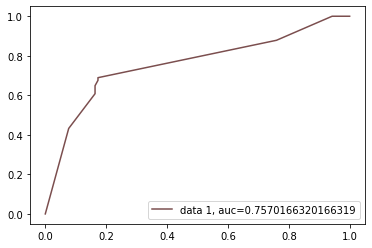

In [47]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()